# Визуальный анализ данных с помощью Python

# 1. API библиотеки matplotlib

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

## 1.1 Создание графиков

### 1.1.1 Создание графиков методом add_subplot

Графики в __matplotlib__ существуют внутри рисунка __Figure__. Создать новый рисунок можно методом `plt.figure`.

Нельзя создать график, имея пустой рисунок. Сначала нужно создать один или несколько подграфиков с помощью метода `add_subplot`.

Метод `add_subplot` возвращает объект __AxesSubplot__, что позволяет рисовать в любом подграфике.

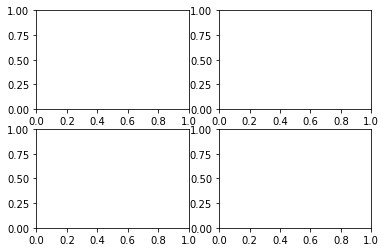

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

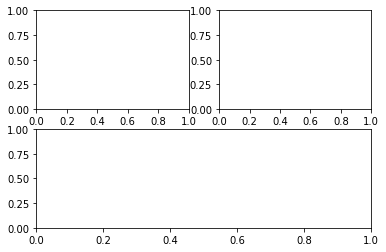

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(221) # Постоить подграфик исходя из размерности 2 строки, 2 столбца на 1 месте
ax2 = fig.add_subplot(222) # Постоить подграфик исходя из размерности 2 строки, 2 столбца на 2 месте
ax3 = fig.add_subplot(212) # Постоить подграфик исходя из размерности 2 строки, 1 столбец на 2 месте

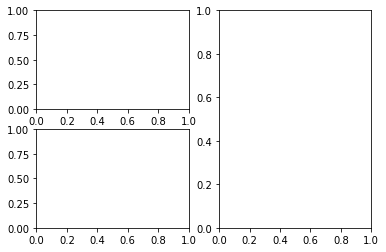

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(122)
ax3 = fig.add_subplot(223)

In [13]:
from numpy.random import randn  # случайные величины нормального распределения

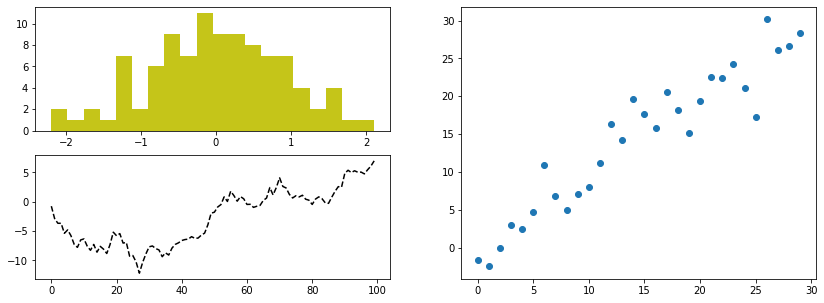

In [43]:
np.random.seed(58)
fig = plt.figure(figsize=(14, 5))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(122)
ax3 = fig.add_subplot(223)

# cumsum() - сумма накапливания
plt.plot(randn(100).cumsum(), 'k--')  # относится к ax3 (последний указанный график)
f = ax1.hist(randn(100), bins=20, color='y', alpha=0.9)  # alpha - прозрачность
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))

In [31]:
f

(array([ 2.,  1.,  2.,  1.,  7.,  2.,  6.,  9.,  7., 11.,  9.,  9.,  8.,
         7.,  7.,  4.,  2.,  4.,  1.,  1.]),
 array([-2.192405  , -1.97734949, -1.76229397, -1.54723846, -1.33218294,
        -1.11712743, -0.90207191, -0.6870164 , -0.47196088, -0.25690537,
        -0.04184985,  0.17320566,  0.38826118,  0.60331669,  0.81837221,
         1.03342772,  1.24848324,  1.46353876,  1.67859427,  1.89364979,
         2.1087053 ]),
 <a list of 20 Patch objects>)

### 1.1.2 Создание одного графика

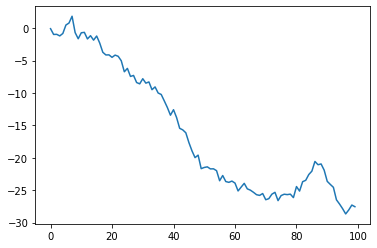

In [32]:
# Автоматически создаёт рисунок и подграфик
plt.plot(randn(100).cumsum())

### 1.1.3 Создание графиков методом plt.subplots

Поскольку создание рисунка с несколькими подграфиками, расположенные определенным образом, - типичная задача, существует вспомогательный метод `plt.subplots`, который создает новый рисунок и возвращает массив Numpy, содержащий в нем объекты подграфиков:

<BarContainer object of 10 artists>

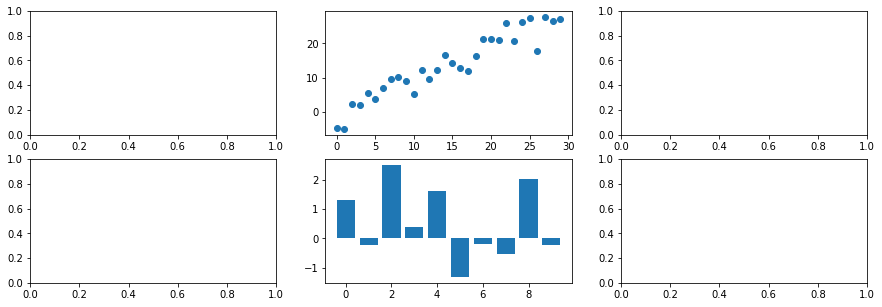

In [41]:
fig, axes = plt.subplots(2, 3)  # передвем колиество строк и столбцов
fig.set_figheight(5)
fig.set_figwidth(15)

axes[0,1].scatter(np.arange(30), np.arange(30) + 3 * randn(30))
axes[1,1].bar(np.arange(10), randn(10))

In [35]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000241260BCBC8>,
      dtype=object)

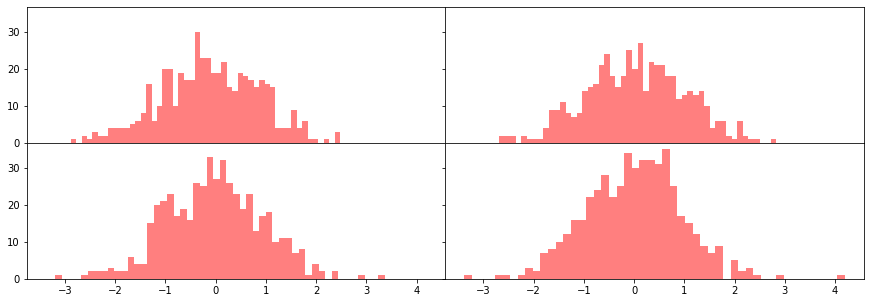

In [48]:
# общие оси
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)  
fig.set_figheight(5)
fig.set_figwidth(15)

for i in range(2):
    for j in range(2):
        axes[i,j].hist(randn(500), bins=50, color='r', alpha=0.5)

# Задание пустого пространства вокруг графиков        
plt.subplots_adjust(wspace=0, hspace=0)        

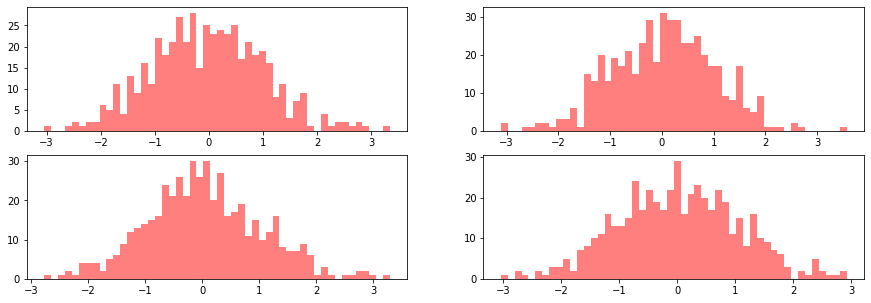

In [52]:
# индивидуальные оси
fig, axes = plt.subplots(2, 2, sharex=False, sharey=False)  
fig.set_figheight(5)
fig.set_figwidth(15)

for i in range(2):
    for j in range(2):
        axes[i,j].hist(randn(500), bins=50, color='r', alpha=0.5)

# Задание непустого пространства вокруг графиков        
plt.subplots_adjust(wspace=0.2, hspace=0.2)   

## 1.2 Сохранение рисунка

In [51]:
plt.savefig('img/figure.png', dpi=400, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

## 1.3 Конфигурирование matplotlib

В начальной конфигурации __matplotlib__ заданы цветовые схемы и умолчания, ориентированные главыным образом на подготовку рисунков к публикации. По счастью, почти все аспекты поведения по умолчанию можно сконфигурировать с помощью обширного набора глобальных параметров, определяюших размер рисунка, промежутки между подграфиками, цвета, размеры шри 

In [56]:
# задает глобальный размер рисунка
plt.rc('figure', figsize=(10, 10))
font_options = {'family' : 'monospace'}
plt.rc('font', **font_options)

In [57]:
x = ['Java', 'Python', 'PHP', 'JavaScript', 'C#', 'C++']
popularity = [22.2, 17.6, 8.8, 8, 7.7, 6.7]

<BarContainer object of 6 artists>

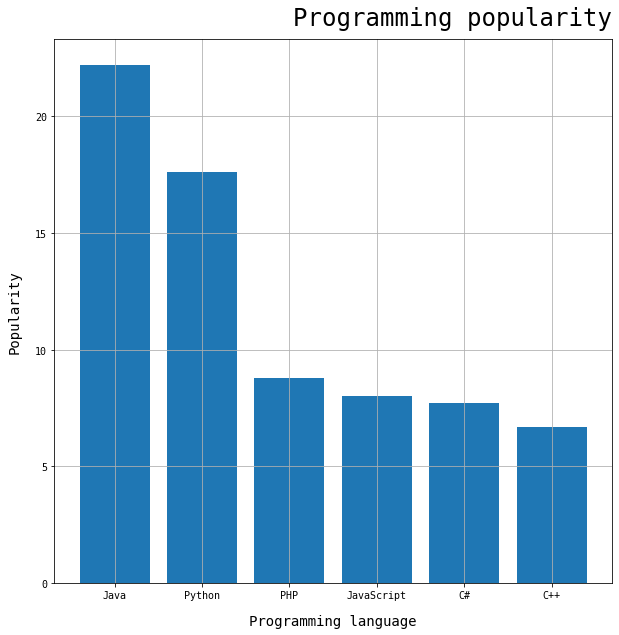

In [86]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Programming language', labelpad=14, fontsize=14)
ax1.set_ylabel('Popularity', labelpad=14, fontsize=14)
ax1.set_title('Programming popularity', pad=14, fontsize=24, loc='right')
ax1.grid()
ax1.bar(x, popularity)

# 2. Визуализация с помощью Pandas

In [89]:
import pandas as pd

In [93]:
df = pd.read_csv('Data/openpowerlifting.csv', sep=',')
df.head(2)

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386414 entries, 0 to 386413
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   MeetID          386414 non-null  int64  
 1   Name            386414 non-null  object 
 2   Sex             386414 non-null  object 
 3   Equipment       386414 non-null  object 
 4   Age             147147 non-null  float64
 5   Division        370571 non-null  object 
 6   BodyweightKg    384012 non-null  float64
 7   WeightClassKg   382602 non-null  object 
 8   Squat4Kg        1243 non-null    float64
 9   BestSquatKg     298071 non-null  float64
 10  Bench4Kg        1962 non-null    float64
 11  BestBenchKg     356364 non-null  float64
 12  Deadlift4Kg     2800 non-null    float64
 13  BestDeadliftKg  317847 non-null  float64
 14  TotalKg         363237 non-null  float64
 15  Place           385322 non-null  object 
 16  Wilks           362194 non-null  float64
dtypes: float64

In [96]:
cols = ['Equipment', 'Age', 'BodyweightKg', 'WeightClassKg', 'BestSquatKg', 'BestBenchKg', 'BestDeadliftKg', 'Place', 'TotalKg', 'Sex']
df = df[cols]
df.head()

,Equipment,Age,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg,Place,TotalKg,Sex
0,Wraps,47.0,59.60,60,47.63,20.41,70.31,1,138.35,F
1,Single-ply,42.0,58.51,60,142.88,95.25,163.29,1,401.42,F
2,Single-ply,42.0,58.51,60,142.88,95.25,163.29,1,401.42,F
3,Raw,42.0,58.51,60,NaN,95.25,NaN,1,95.25,F
4,Raw,18.0,63.68,67.5,NaN,31.75,90.72,1,122.47,F


## 2.1 Одномерные данные

### 2.1.1 Столбчая диаграмма

**Bar Chart (столбчатая диаграмма)** - классический инструмент для отображения информации по категориям

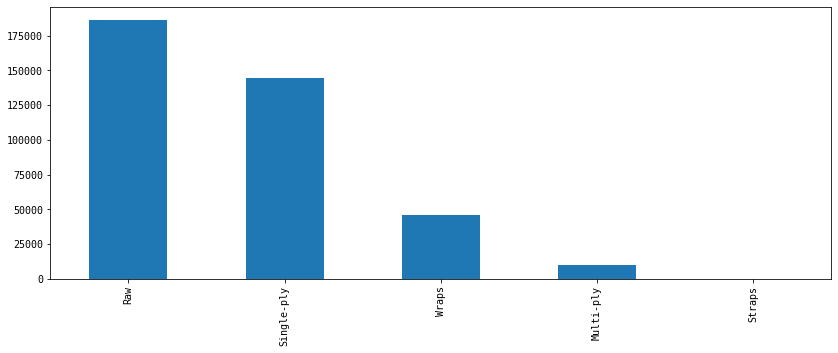

In [98]:
fig = plt.figure(figsize=(14, 5))
df['Equipment'].value_counts().plot.bar()

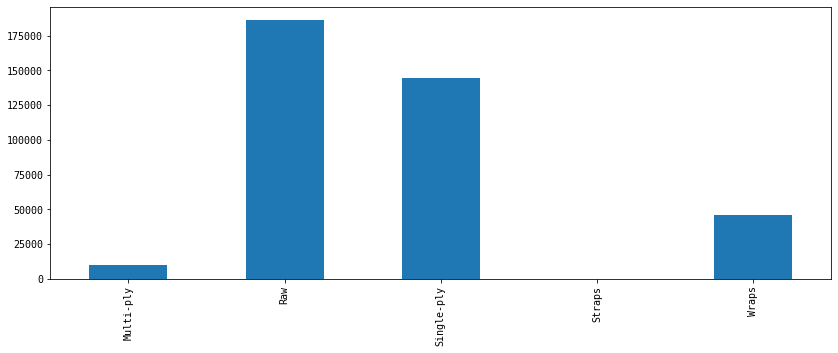

In [99]:
# Отсортированные индексы серии value_counts()
fig = plt.figure(figsize=(14, 5))
df['Equipment'].value_counts().sort_index().plot.bar()

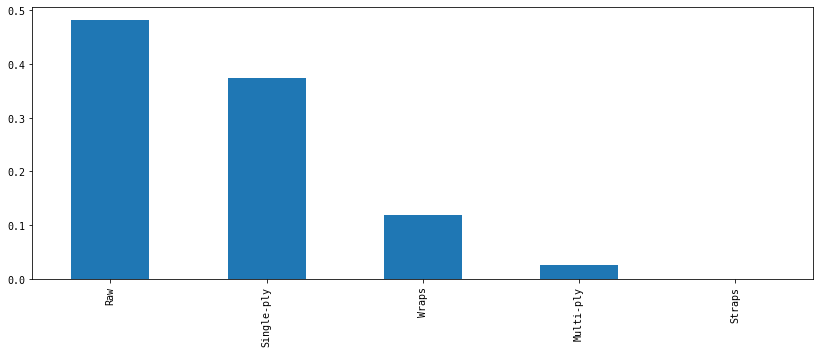

In [104]:
# Относительные наблюдения
fig = plt.figure(figsize=(14, 5))
(df['Equipment'].value_counts() / len(df)).plot.bar()

In [107]:
df.groupby(['Equipment'])[['BodyweightKg', 'TotalKg']].mean()

,BodyweightKg,TotalKg
Equipment,,
Multi-ply,102.474594,564.909626
Raw,85.221058,387.071285
Single-ply,86.649009,428.380619
Straps,116.571429,388.214286
Wraps,91.546736,534.348735


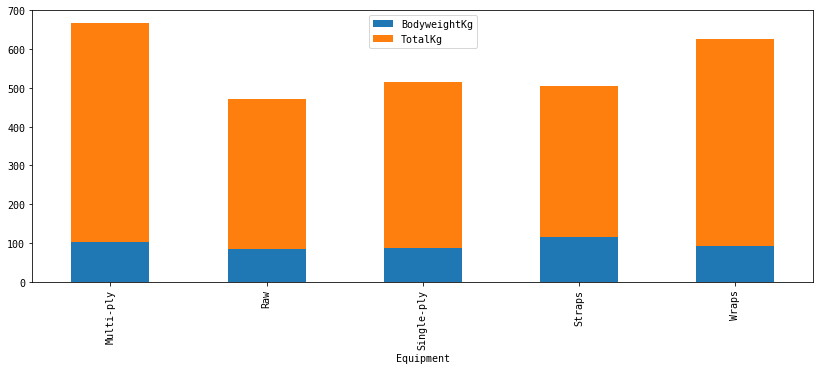

In [108]:
df.groupby(['Equipment'])[['BodyweightKg', 'TotalKg']].mean().plot.bar(figsize=(14, 5), stacked=True)

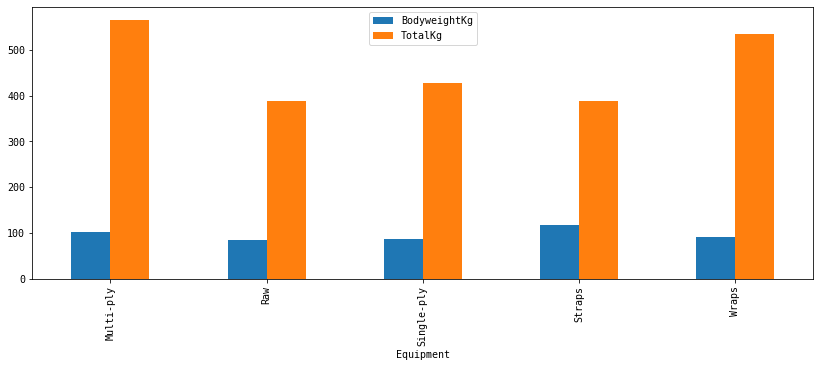

In [110]:
df.groupby(['Equipment'])[['BodyweightKg', 'TotalKg']].mean().plot.bar(figsize=(14, 5))

### 2.1.2 Линии, области

Используется при большом количестве вариантов категориальной переменной (более 20 значений)

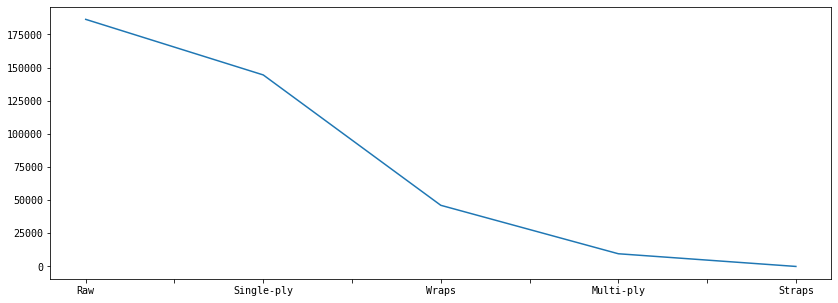

In [113]:
fig = plt.figure(figsize=(14, 5))
chart = df['Equipment'].value_counts().plot.line()

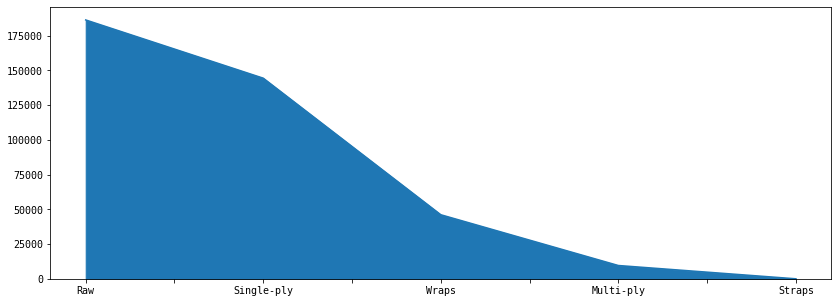

In [114]:
fig = plt.figure(figsize=(14, 5))
chart = df['Equipment'].value_counts().plot.area()

### 2.1.3 Гистограмма

**Гистограмма** - классический инструмент для визуализации интервальных данных. Визуально похожа на столбчатую диаграмму, гистограмма разбивает данные на равные интервалы и рисует частоты в каждом из столбцов

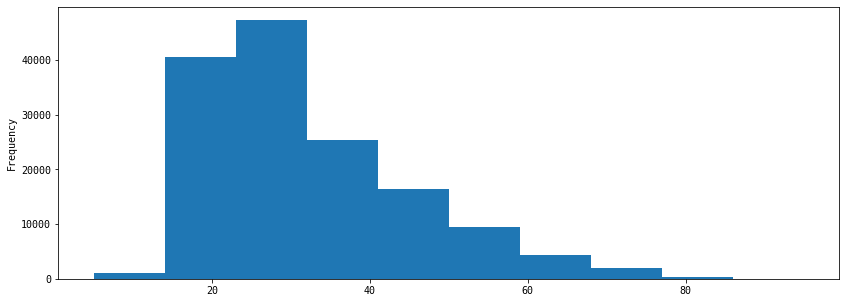

In [115]:
fig = plt.figure(figsize=(14, 5))
df['Age'].plot.hist(bins=10)

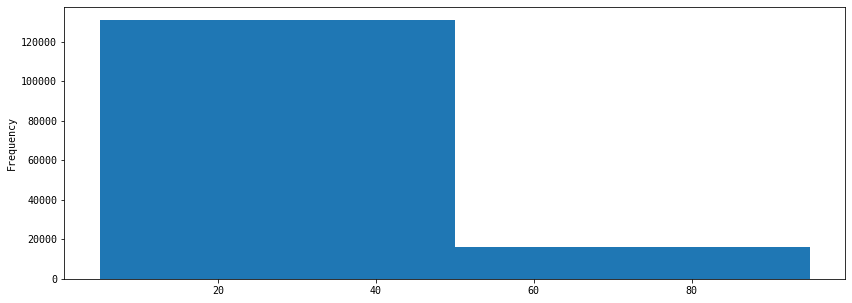

In [120]:
# Параметр bins - количество разбиений - столбцов(контейнеров)
fig = plt.figure(figsize=(14, 5))
df['Age'].plot.hist(bins=2)

## 2.2 Двумерные данные

Используются для того, чтобы показать зависимость одного параметра от другого

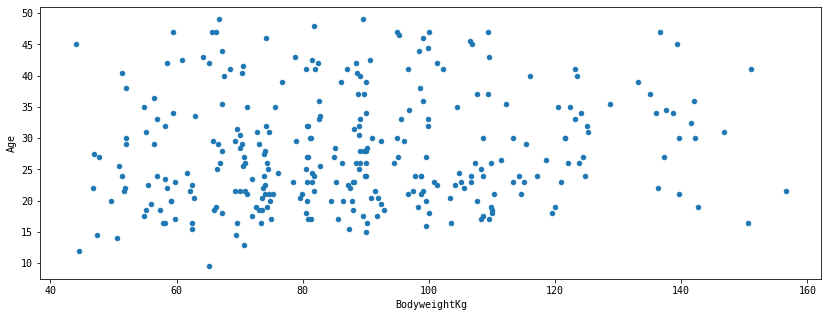

In [122]:
# sample(300) - возвращает 300 случайных значений 
df[df['Age'] < 50].sample(300).plot.scatter(x='BodyweightKg', y='Age', figsize=(14, 5))

Без `sample` для всего датасета - не очень понятно:

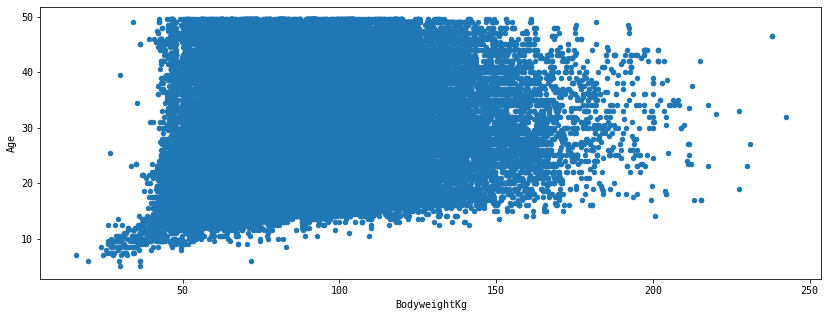

In [123]:
df[df['Age'] < 50].plot.scatter(x='BodyweightKg', y='Age', figsize=(14, 5))

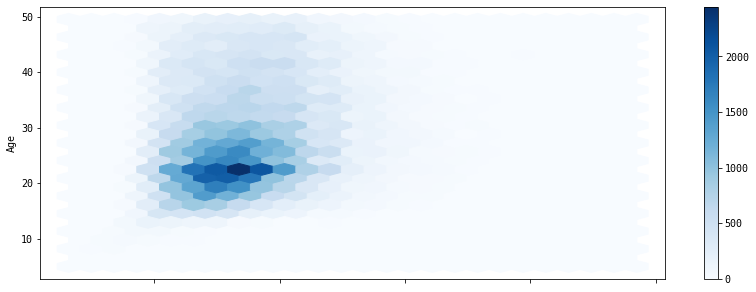

In [127]:
df[df['Age'] < 50].plot.hexbin(x='BodyweightKg', y='Age', figsize=(14, 5), gridsize=25, cmap='Blues')

# 3. Визуализация с помощью Seaborn

In [132]:
import seaborn as sns

## 3.1 Countplot

*Pandas bar = Seaborn countplot*. Делается намного проще, нет нужды в агрегации с помощью `value_counts`

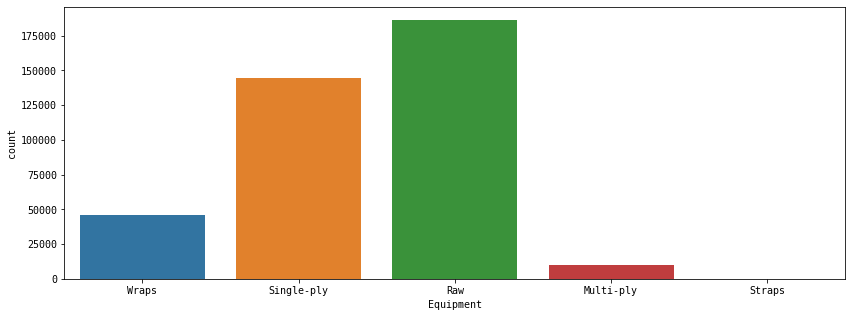

In [133]:
fig = plt.figure(figsize=(14, 5))
sns.countplot(df['Equipment'])

## 3.2 Kdeplot

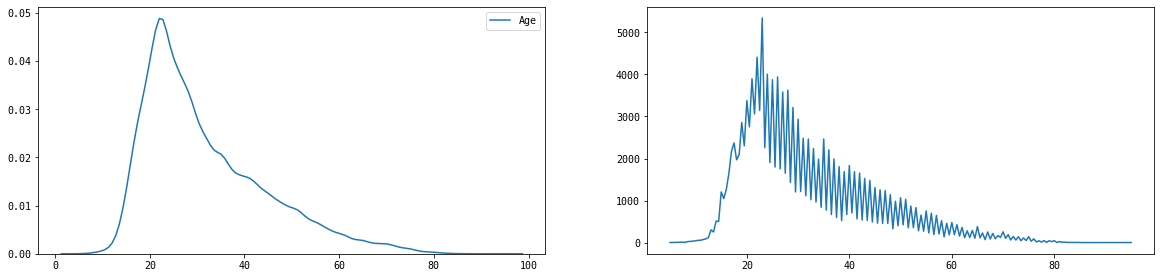

In [134]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(221)
sns.kdeplot(df.Age)
# В статистике - оценка плотности ядра - один из вариантов сглаживания
ax2 = fig.add_subplot(222)
df['Age'].value_counts().sort_index().plot.line()

C:\Programs\Anaconda\anaconda3\lib\site-packages\seaborn\distributions.py:693: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


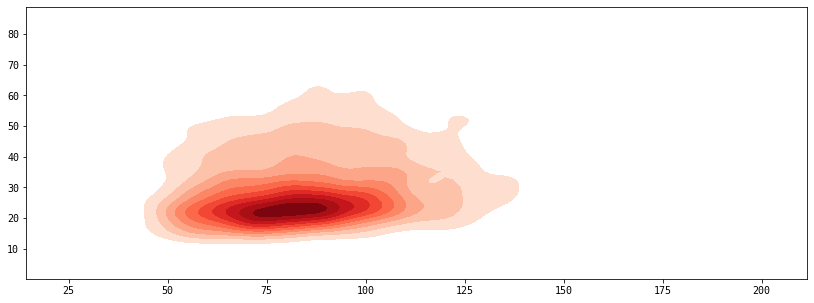

In [136]:
fig = plt.figure(figsize=(14, 5))
sns.kdeplot(df.loc[:, ['BodyweightKg', 'Age']].dropna().sample(5000), color='r',
                                       cmap='Reds', shade=True, shade_lowest=False)

## 3.3 Distplot

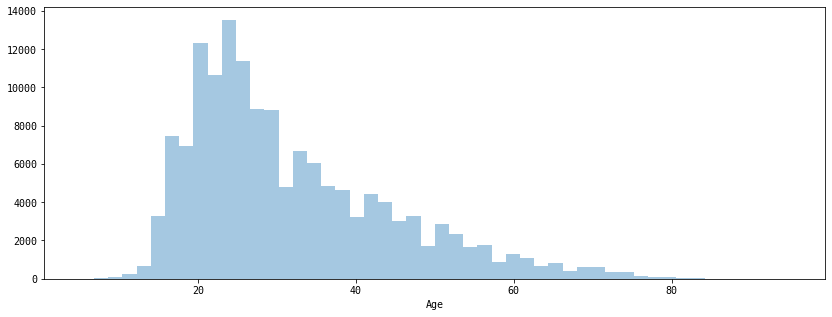

In [148]:
# Аналог гистограммы
fig = plt.figure(figsize=(14, 5))
sns.distplot(df['Age'].dropna(), kde=False)

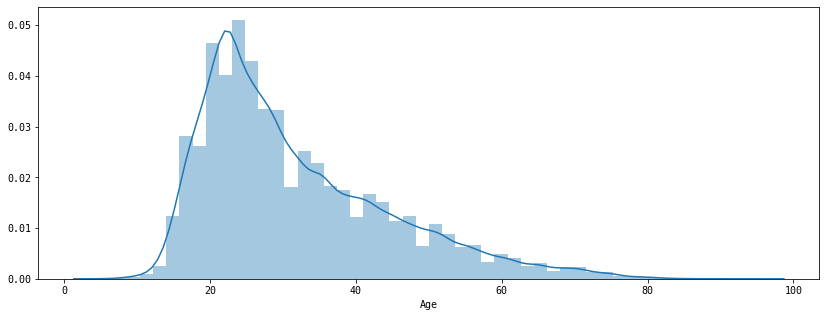

In [149]:
fig = plt.figure(figsize=(14, 5))
sns.distplot(df['Age'].dropna(), kde=True)

## 3.4 Jointplot

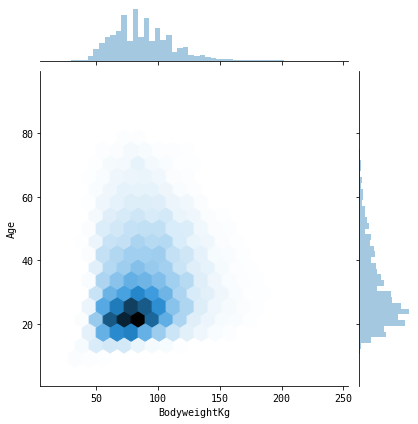

In [146]:
#Аналог scatterplot
sns.jointplot('BodyweightKg', 'Age', data=df, kind='hex', gridsize=20)

## 3.4 Boxplot - ящик с усами

Границами ящика служат первый и третий квартили (25% и 75% процентили соответственно), линия в середине ящика - медиана (50% процентиль). Концы усов - края статистически значимой выборки (без выбросов), они могут определяться несколькими способами.Наиболее распространенные значения, определющие длину "усов":
+ Максимальное и минимальное наблюдаемые значения данных по выборке (в этом случае выбросы отсутствуют);
+ Разноть первого квартиля и полутора межквартильных расстояний; сумма третьего квартиля и полутора межквартильных расстояний.

#### ![Boxplot](img/boxplot.png "ящик с усами")

Данные выхадящие за границы учсов (выбросы), отображаются на графике в виде кружков или звездочек. Иногда на графике отмечают среднее арифметическое и его доверительный интервал ("Зарубка на ящике"). Иногда зарубками обозначают доверительный интервал для медианы.

В связи с тем что не существует единого общего согласия относительно того, как конкретно строить "ящик с усами", при виде такого графика необходими искать информацию в сопроводительном тексте относительно того, по каким параметрам "ящик с усами" строился.

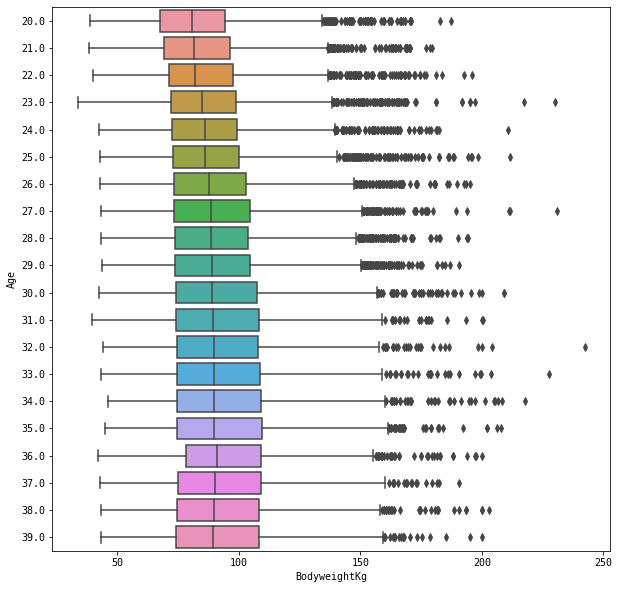

In [147]:
sns.boxplot(y='Age', x='BodyweightKg', data=df[df.Age.isin(np.arange(20, 40, 1))], orient='h')

## 3.5 Violinplot (в виде скрипки)

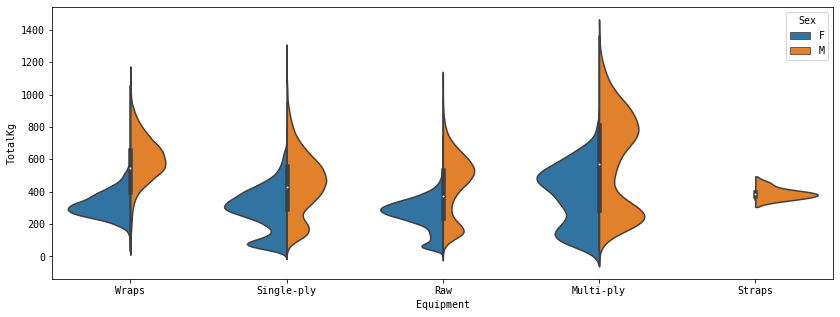

In [151]:
fig = plt.figure(figsize=(14, 5))
sns.violinplot(y='TotalKg', x='Equipment', hue='Sex', split=True, data=df)

## 3.6 Pairplot

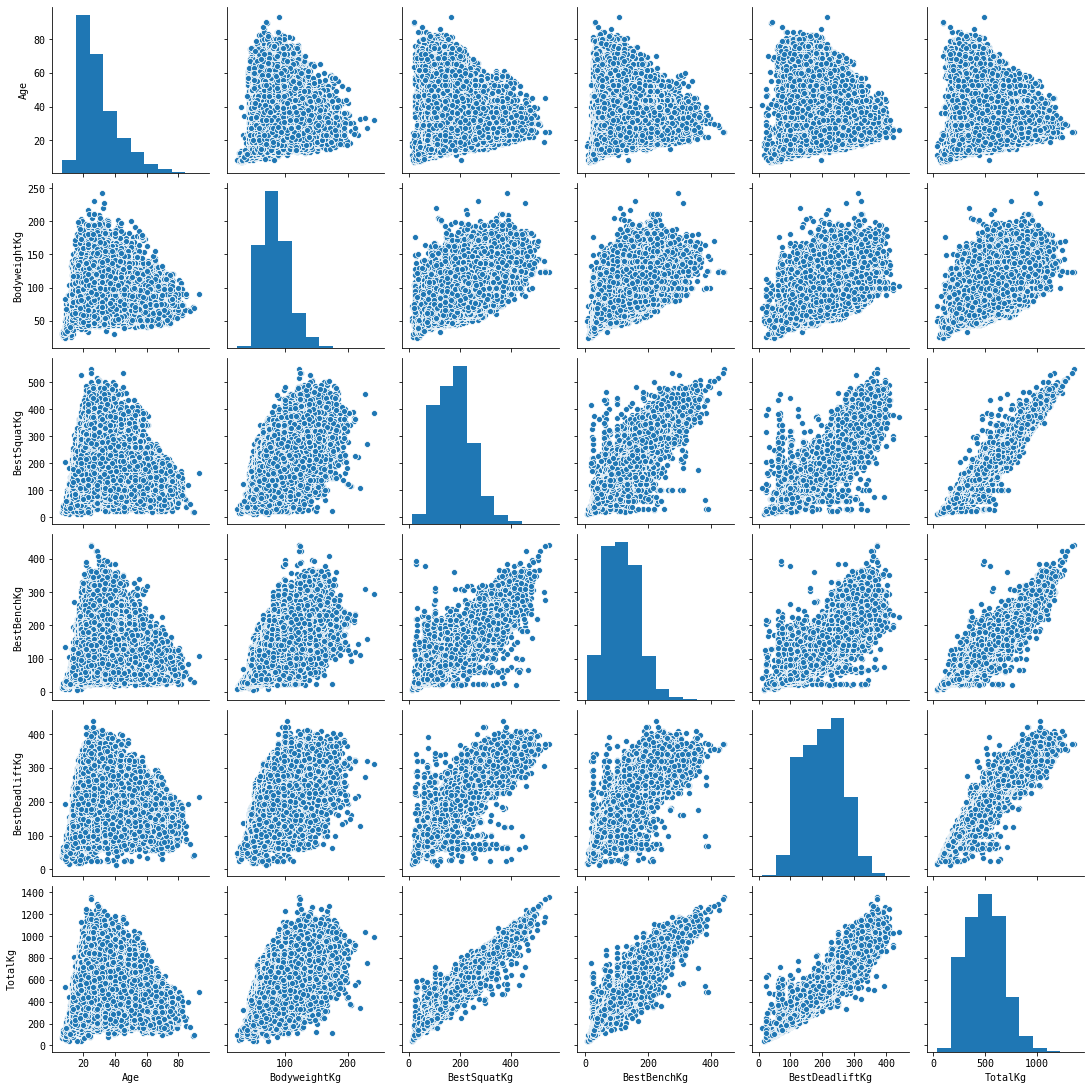

In [152]:
cols = ['Age', 'BodyweightKg', 'BestSquatKg', 'BestBenchKg', 'BestDeadliftKg', 'TotalKg']
sns_plot = sns.pairplot(df[cols].dropna())

## 3.7 Корреляция признаков. Тепловая карта

In [153]:
df[cols].dropna().corr()

,Age,BodyweightKg,BestSquatKg,BestBenchKg,BestDeadliftKg,TotalKg
Age,1.000000,0.105304,-0.033262,0.034416,-0.037814,-0.016395
BodyweightKg,0.105304,1.000000,0.653468,0.663675,0.639829,0.674406
BestSquatKg,-0.033262,0.653468,1.000000,0.911109,0.907187,0.976384
BestBenchKg,0.034416,0.663675,0.911109,1.000000,0.877505,0.956819
BestDeadliftKg,-0.037814,0.639829,0.907187,0.877505,1.000000,0.962902
TotalKg,-0.016395,0.674406,0.976384,0.956819,0.962902,1.000000


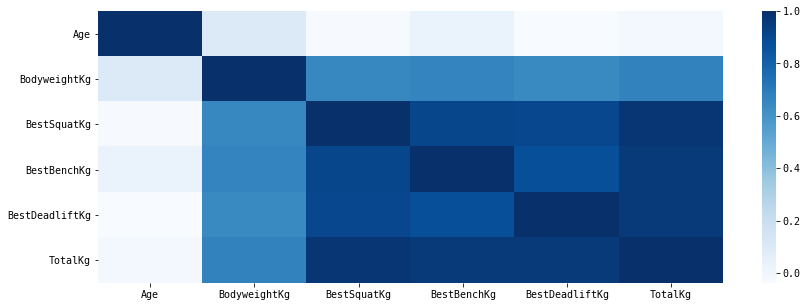

In [154]:
fig = plt.figure(figsize=(14, 5))
sns.heatmap(df[cols].dropna().corr(), cmap='Blues')

# 4. Визуализация уличных карт

In [156]:
# import folium
# from folium import plugins